In [1]:
import pandas as pd
from cw.cfg import DATA_DIR, PLOT_DIR
from cw.data import Data
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
from sklearn.feature_selection import r_regression
import warnings
import seaborn as sns 
from scipy.stats import pearsonr
import numpy as np


In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [17]:
def function_get_stats(model:str):

    r_test = []
    r_train = []
    test_station = []
    
    for each_data in data:
        test_station_id = each_data.test_station_id
        x_train = each_data.x_train
        x_test = each_data.x_test
        y_train = each_data.y_train
        y_test = each_data.y_test
        
        if model == "lin_reg":
            reg = LinearRegression().fit(x_train,y_train)
        elif model == "rf":
            reg = RandomForestRegressor().fit(x_train,y_train)

        y_pred_test = reg.predict(x_test)
        y_pred_train = reg.predict(x_train)
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4), dpi=200)
        
        ax1.scatter(y_train, y_pred_train, s = 0.5, label = f"r : {pearsonr(y_train.reshape(-1), y_pred_train.reshape(-1))[0]:.2f}")

        ax1.set_ylabel("Prediction")
        ax1.set_xlabel("Observation")
        ax1.legend()

        ax2.scatter(y_test, y_pred_test, s= 0.5, label = f"r : {pearsonr(y_test.reshape(-1), y_pred_test.reshape(-1))[0]:.2f}")

        ax2.set_ylabel("Prediction")
        ax2.set_xlabel("Observation")
        ax2.legend()
        plt.tight_layout()
        plt.savefig(PLOT_DIR+f"test_station_{each_data.test_station_id}_{model}.png")
        plt.close()

        r_test.append(pearsonr(y_test.reshape(-1), y_pred_test.reshape(-1))[0])
        r_train.append(pearsonr(y_train.reshape(-1), y_pred_train.reshape(-1))[0])
    print(f"Num of dimensions of input: {x_train.shape[1]}")
    return r_test, r_train


In [15]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT"])

r_test_lin_reg_s, r_train_lin_reg_s = function_get_stats("lin_reg")
r_test_rf_s, r_train_rf_s = function_get_stats("rf")

There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[-233.18294689 -756.17641847]
937.0407310086669
[-232.17890046 -745.78978994]
927.5291111922824
[-230.20685594 -739.45574232]
920.673822501937
[-267.98675435 -865.14291885]
1049.4447600410974
[-231.54868727 -746.90925509]
927.6255766801814
[-229.30205372 -731.66065326]
912.2971932735375
[-213.37587985 -670.44723923]
839.5526115553826
[-233.12399404 -743.92215444]
923.6491095120496
[-246.12610373 -797.31051468]
982.0932299017018
[-235.45675596 -758.86966802]
940.6816705405964
[-236.08656877 -770.21713296]
951.7021780532976
[-224.69026966 -718.2042516 ]
897.8750262223664
[-232.74771469 -754.05768885]
934.2381792974717
[-233.85942525 -743.12657498]
928.4033859798379
[-261.95534818 -831.64525919]
1023.1717323327675
[-237.31022192 -775.48030948]
956.8449972863185
[-234.66208322 -758.98556988]
939.9944121151311
[-232.42666939 -750.73488782]
931.5370373733017
[

In [12]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]"])

r_test_lin_reg_sh, r_train_lin_reg_sh = function_get_stats("lin_reg")
r_test_rf_sh, r_train_rf_sh = function_get_stats("rf")

There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[  -1.81191069 -237.96517032 -768.40285652]
990.674247821996
[  -2.05934231 -236.34468074 -754.98587438]
984.0634471306756
[  -1.43419504 -233.93119531 -748.82977704]
962.7128677627938
[  -2.13902909 -272.16213207 -874.58651242]
1109.1699975390418
[  -2.07369669 -235.70582422 -756.44866588]
984.812149030645
[  -1.96562269 -232.61006124 -738.00661661]
963.7692844447588
[  -0.76313901 -215.10052461 -673.52141273]
861.8399738299138
[  -2.2659458  -238.21626079 -754.67600899]
986.2029861756475
[  -1.70782165 -249.38238307 -804.0727438 ]
1027.9006748409972
[  -1.96281837 -239.54332456 -768.22594415]
995.114063314372
[  -1.58426926 -238.97818931 -774.81973834]
992.4958573264798
[  -1.99779166 -228.64590322 -727.99892611]
953.7429788551401
[  -1.94621463 -234.16679462 -752.33210453]
976.7463083639724
[  -2.03892747 -238.106441   -752.44109582]
984.6004172339359

In [18]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]", 'WIDTH[m]'])

r_test_lin_reg_shw, r_train_lin_reg_shw = function_get_stats("lin_reg")
r_test_rf_shw, r_train_rf_shw = function_get_stats("rf")


There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
Num of dimensions of input: 4
Num of dimensions of input: 4


In [7]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]", 'WIDTH[m]', "ORDER"])

r_test_lin_reg_shwo, r_train_lin_reg_shwo = function_get_stats("lin_reg")
r_test_rf_shwo, r_train_rf_shwo = function_get_stats("rf")


There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[ -10.52817878    5.16281419  -44.32395143 -269.88922707 -890.16218312]
1489.126223015354
[ -11.56616389    5.22918266  -50.34714642 -267.16437048 -868.62087513]
1539.1252907617059
[ -11.6305766     5.19672714  -45.85217601 -274.57088382 -897.48562043]
1531.117930004028
[  -11.20307982     5.16929748   -44.63496221  -306.74418393
 -1006.58598551]
1629.8157668738363
[ -11.16857191    5.18878159  -46.90096583 -267.6233688  -877.45332469]
1510.8989385791556
[ -10.85968427    5.17345941  -45.58665556 -264.81628235 -859.84938386]
1475.9243039878893
[  -7.08317613    5.31724176  -51.3249868  -253.33576993 -831.60343556]
1369.6573543599754
[ -11.35779999    5.18693686  -46.99360157 -270.77802911 -876.19276826]
1513.237880490486
[ -10.74081212    5.17124749  -46.08428426 -278.17177641 -912.21561907]
1531.8264711660004
[ -10.75037202    5.17411768  -45.21008376 -

In [8]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]", 'WIDTH[m]', "ORDER", "AREA[m2]"])

r_test_lin_reg_shwoa, r_train_lin_reg_shwoa = function_get_stats("lin_reg")
r_test_rf_shwoa, r_train_rf_shwoa = function_get_stats("rf")


There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[-1.08003605e+01  5.24498993e+00 -5.42933488e+01  1.63777900e-08
 -2.72936132e+02 -9.02050093e+02]
1567.3496317063425
[-1.19586408e+01  5.33519184e+00 -6.29837169e+01  1.99504180e-08
 -2.70020281e+02 -8.79613915e+02]
1636.3764097549401
[-1.19190469e+01  5.28227303e+00 -5.61384554e+01  1.69693205e-08
 -2.77486621e+02 -9.08878505e+02]
1611.0559219804318
[-1.12484924e+01  5.24225982e+00 -5.36727203e+01  1.47462434e-08
 -3.09429794e+02 -1.01674380e+03]
1694.496588573887
[-1.14576382e+01  5.27643530e+00 -5.74967412e+01  1.73429344e-08
 -2.70345659e+02 -8.88399528e+02]
1592.503124588541
[-1.11175918e+01  5.25664307e+00 -5.56733644e+01  1.66489152e-08
 -2.67310968e+02 -8.69762089e+02]
1552.5361458103039
[-7.33243856e+00  5.34786775e+00 -5.54852370e+01  7.28241124e-09
 -2.55077075e+02 -8.37719939e+02]
1407.4825194492053
[-1.16396826e+01  5.27223010e+00 -5.732743

In [9]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]", "AREA[m2]"])

r_test_lin_reg_sha, r_train_lin_reg_sha = function_get_stats("lin_reg")
r_test_rf_sha, r_train_rf_sha = function_get_stats("rf")

There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[-1.11790529e+00  1.36639770e-08 -2.40829010e+02 -7.84814317e+02]
977.3371836166585
[-1.43813888e+00  1.24562036e-08 -2.39725282e+02 -7.72734506e+02]
974.7186050174747
[-7.53801297e-01  1.35351574e-08 -2.37288431e+02 -7.66974295e+02]
951.4701573241789
[-1.35254564e+00  1.31525443e-08 -2.75905103e+02 -8.94059432e+02]
1096.2524752567597
[-1.42935876e+00  1.28442731e-08 -2.39081464e+02 -7.73977368e+02]
974.3948538739484
[-1.31032113e+00  1.31325227e-08 -2.37284869e+02 -7.60770851e+02]
958.0637569301346
[-6.10767931e-01  1.18536758e-08 -2.19558382e+02 -6.94189094e+02]
869.96575206803
[-1.59855534e+00  1.25539099e-08 -2.41083351e+02 -7.71495761e+02]
975.0276571842074
[-1.13550540e+00  1.20707091e-08 -2.51846280e+02 -8.18196363e+02]
1016.2754843784527
[-1.33468138e+00  1.27850431e-08 -2.42842597e+02 -7.85187128e+02]
984.5118303257161
[-9.50476110e-01  1.321661

In [10]:
ml_data = pd.read_csv(DATA_DIR + "ml_data_v2.csv")

raw_data = Data(ml_data)

data = raw_data.get_ml_data(["SPOTTED_AT", "HEIGHT1[cm]", "ORDER"])

r_test_lin_reg_sho, r_train_lin_reg_sho = function_get_stats("lin_reg")
r_test_rf_sho, r_train_rf_sho = function_get_stats("rf")

There are total 33 stations
Maxinmum and minimum number of readings for a station is 923 and 16
The total number of readings are 3873
[   3.91711813   54.98163287 -243.27023387 -826.09781278]
478.62510461979707
[   3.57197826   54.75271402 -251.34999529 -848.0212513 ]
508.1516052222938
[   4.05533026   53.73951831 -244.99480469 -826.64909828]
485.2981968130303
[   2.97134477   53.75822721 -284.94356243 -961.14541826]
649.9938478861352
[   3.43783581   53.73973298 -248.7239593  -837.39137608]
509.09407429701275
[   3.50515384   54.11220625 -255.45946347 -858.95002642]
526.3569564801476
[   3.46854141   53.36190419 -231.9134823  -776.96067952]
448.8758116646899
[   3.58674678   54.09321773 -247.14144909 -833.02891205]
499.0292459877385
[   3.37089823   52.79970893 -255.60907854 -862.35963972]
544.9847234948398
[   3.35056063   53.99531121 -251.76978243 -852.15892598]
525.9364785017228
[   3.97047164   54.35026089 -252.40573524 -866.45030234]
522.8280554531369
[   4.07633448   55.76413599

/tmp/ipykernel_28923/4294488932.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation = 90)


Text(0, 0.5, 'Correlation values for training set')

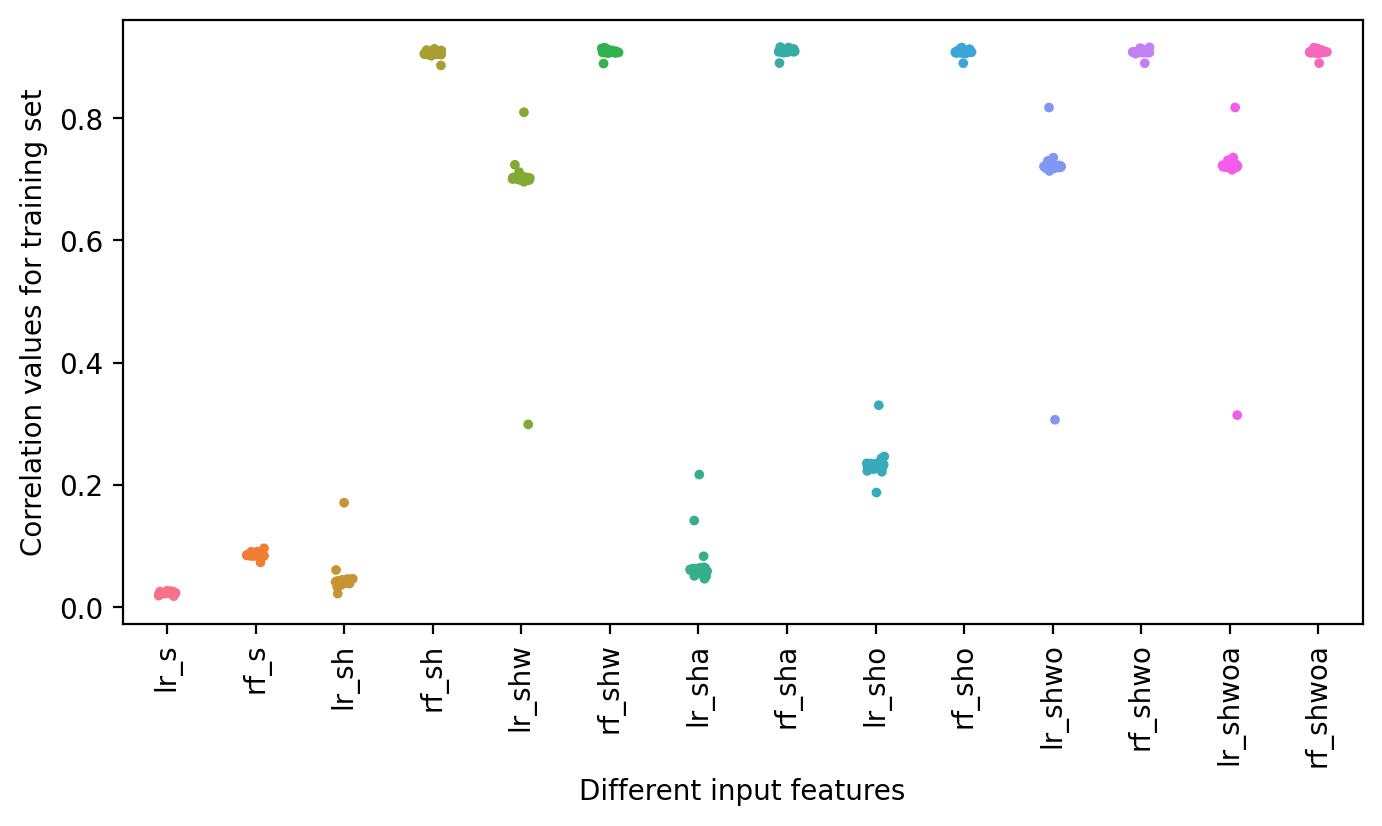

In [11]:
columns = ["lr_s", "rf_s", "lr_sh", "rf_sh", "lr_shw", "rf_shw", "lr_sha", "rf_sha", "lr_sho", "rf_sho", "lr_shwo", "rf_shwo", "lr_shwoa", "rf_shwoa"]
plot_data = pd.DataFrame(
    np.squeeze(np.array([ r_train_lin_reg_s, r_train_rf_s, r_train_lin_reg_sh, r_train_rf_sh, r_train_lin_reg_shw, r_train_rf_shw, r_train_lin_reg_sha, r_train_rf_sha , r_train_lin_reg_sho, r_train_rf_sho ,r_train_lin_reg_shwo, r_train_rf_shwo,r_train_lin_reg_shwoa, r_train_rf_shwoa,])).T,
    columns = columns)

fig, ax = plt.subplots(1,1, figsize = (8,4), dpi=200)

sns.stripplot(plot_data, jitter=True, size = 3.5, ax = ax)
ax.set_xticklabels(columns, rotation = 90)
ax.set_xlabel("Different input features")
ax.set_ylabel("Correlation values for training set")




/tmp/ipykernel_28923/4010343646.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation = 90)


Text(0, 0.5, 'Correlation values for test set')

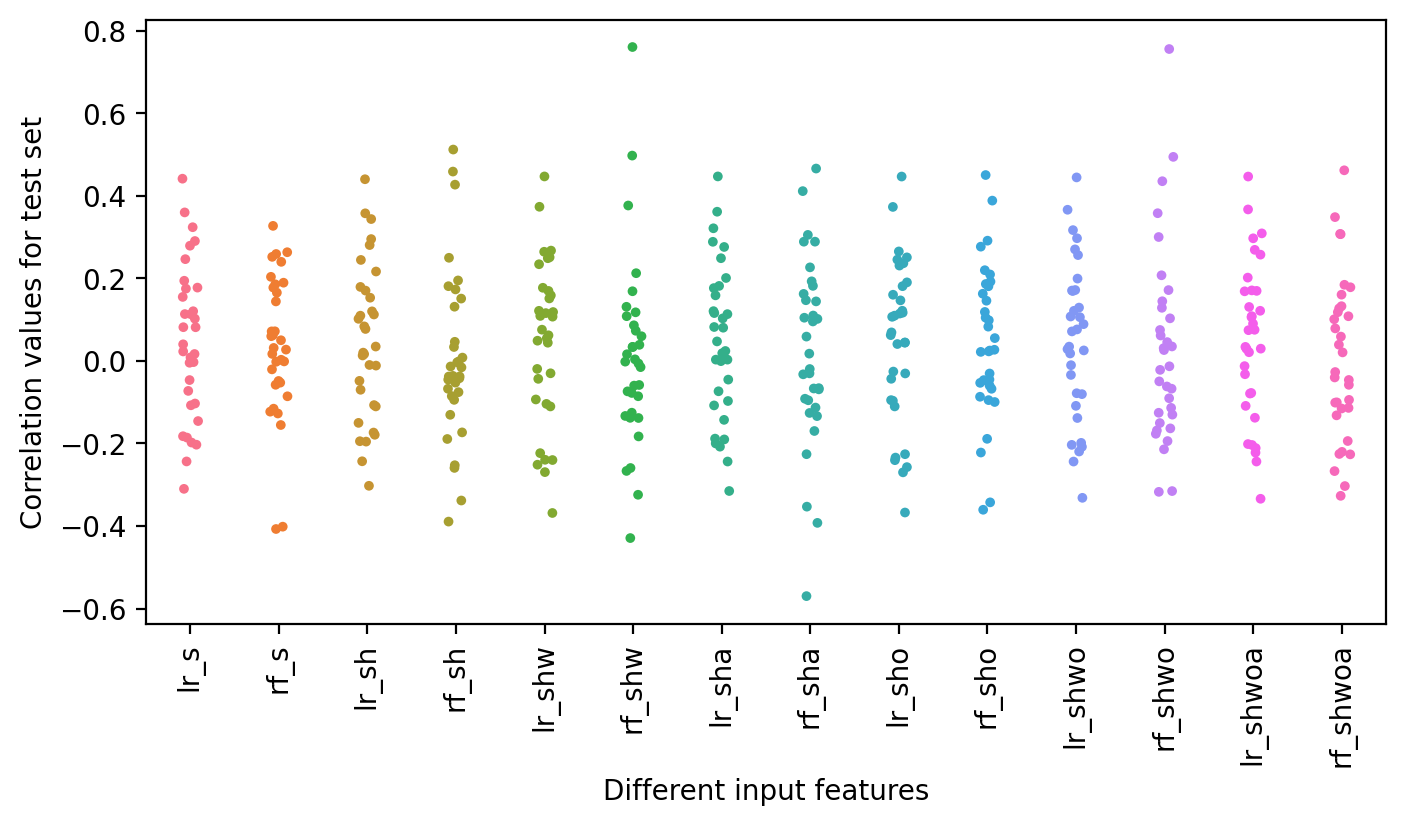

In [12]:
columns = ["lr_s", "rf_s", "lr_sh", "rf_sh", "lr_shw", "rf_shw", "lr_sha", "rf_sha","lr_sho", "rf_sho", "lr_shwo", "rf_shwo", "lr_shwoa", "rf_shwoa"]
plot_data = pd.DataFrame(
    np.squeeze(np.array([ r_test_lin_reg_s, r_test_rf_s, r_test_lin_reg_sh, r_test_rf_sh, r_test_lin_reg_shw, r_test_rf_shw, r_test_lin_reg_sha, r_test_rf_sha , r_test_lin_reg_sho, r_test_rf_sho  ,r_test_lin_reg_shwo, r_test_rf_shwo,r_test_lin_reg_shwoa, r_test_rf_shwoa,])).T,
    columns = columns)

fig, ax = plt.subplots(1,1, figsize = (8,4), dpi=200)

sns.stripplot(plot_data, jitter=True, size = 3.5, ax = ax)

ax.set_xticklabels(columns, rotation = 90)
ax.set_xlabel("Different input features")
ax.set_ylabel("Correlation values for test set")

In [13]:
ml_data

,ROOT_ID,LATITUDE,LONGITUDE,WATER_LEVEL,SPOTTED_AT,Minimum_Distance_KM,Lat_Index,Lon_Index,efas_dis06,HEIGHT1[cm],HEIGHT2[cm],WIDTH[m],ORDER,AREA[m2]
0,17207,47.391856,8.523348,1.0,2017-05-05 22:18:00,2.277,560,341,104.487305,31.00,27,60.0,9,1.324205e+09
1,17207,47.391856,8.523348,1.0,2017-05-09 20:47:00,2.277,560,341,129.662109,31.00,27,60.0,9,1.324205e+09
2,17207,47.391856,8.523348,-1.0,2017-05-12 21:38:00,2.277,560,341,102.737305,31.00,27,60.0,9,1.324205e+09
3,17207,47.391856,8.523348,-1.0,2017-05-14 13:21:00,2.277,560,341,101.187500,31.00,27,60.0,9,1.324205e+09
4,17207,47.391856,8.523348,-1.0,2017-05-31 20:11:00,2.277,560,341,76.376953,31.00,27,60.0,9,1.324205e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,485987,48.327996,16.207490,1.0,2022-03-30 17:08:00,2.231,535,456,3072.303223,21.75,26,1.2,5,4.010294e+08
3869,485987,48.327996,16.207490,1.0,2022-04-06 17:31:00,2.231,535,456,3072.303223,21.75,26,1.2,5,4.010294e+08
3870,485987,48.327996,16.207490,3.0,2022-05-18 16:40:00,2.231,535,456,3072.303223,21.75,26,1.2,5,4.010294e+08
3871,485987,48.327996,16.207490,4.0,2022-05-25 16:36:00,2.231,535,456,3072.303223,21.75,26,1.2,5,4.010294e+08
